# Research-Track-2-Assignment-3

This jupyter notebook was made in order to compare the efficiency of my code with my colleague's code of the first assignment in RT1. 
In order to do that, statistical analysis were carried out to test which implementation performed better.
About 25 readings were made but only 17 were complete and therefore used for this analysis.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

## Times recorded from my implementation and my colleague's

In [2]:
my_time = np.array([114, 113.52, 109.09, 107.62, 104.53, 107.37, 117.28, 133.79, 106.5, 109.02, 108.88, 98.80, 100.96, 107.14, 118.58, 110.55, 114.66])
time_colleague = np.array([93.91, 95.97, 96.6, 98.15, 92.3, 113.47, 98.78, 115.12, 98.15, 92.16, 93.05, 92.38, 98.59, 92.47, 113.28, 98.54, 112.43])

## Mean and standard deviation from my implementation and my colleague's

In [3]:
my_mean = np.mean(my_time)
colleague_mean = np.mean(time_colleague)

my_std = np.std(my_time)
colleague_std = np.std(time_colleague)

## Bar plot comparing the times of my implementation and my colleague's:

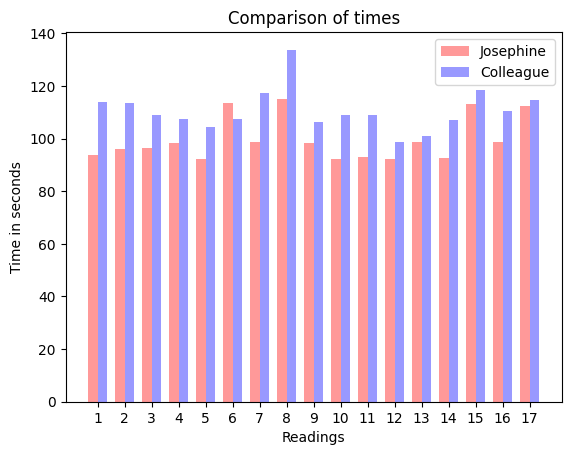

In [4]:
my_time = (93.91, 95.97, 96.6, 98.15, 92.3, 113.47, 98.78, 115.12, 98.15, 92.16, 93.05, 92.38, 98.59, 92.47, 113.28, 98.54, 112.43)
time_colleague = (114, 113.52, 109.09, 107.62, 104.53, 107.37, 117.28, 133.79, 106.5, 109.02, 108.88, 98.80, 100.96, 107.14, 118.58, 110.55, 114.66)
index = np.arange(len(my_time))

width = 0.35

plt.bar(index, my_time, width, alpha=0.4, color='r', label='Josephine')
plt.bar(index + width, time_colleague, width, alpha=0.4, color='b', label='Colleague')

plt.xlabel('Readings')
plt.ylabel('Time in seconds')
plt.title('Comparison of times')
plt.xticks(index + width / 2, range(1, len(my_time) + 1))
plt.legend()

plt.show()

## Shapiro Wilk test
Shapiro Wilk test was used to determine whether the data is normally distributed or not.
The null hypothesis H0 states that my code performs better than my colleague's code, the robot assembles all the tokens faster.
A significance of 0.05 was considered in order to decide whether it is a normal distribution.
If the P-value is greater that the significance level, we can conclude that the data is normally distributed and the null hypothesis cannot be rejected.
Otherwise, the null hypothesis is rejected and it is not considered as normally distributed.

In [5]:
sig_level = 0.05
my_stat, my_p_value = stats.shapiro(my_time)
stat_colleague, p_colleague = stats.shapiro(time_colleague)

if my_p_value > sig_level:
    print("The data is normally distributed for my sample.")
    print("P-value =", my_p_value, "| Significance level =", sig_level)
else:
    print("The data is not normally distributed for my sample.")
    print("P-value =", my_p_value, "| Significance level =", sig_level)
print("--------------------------------------------------------------")
if p_colleague > sig_level:
    print("The data is normally distributed for the colleague.")
    print("P-value =", p_colleague, "| Significance level =", sig_level)
else:
    print("The data is not normally distributed for the colleague.")
    print("P-value =", p_colleague, "| Significance level =", sig_level)

The data is not normally distributed for my sample.
P-value = 0.000987845822237432 | Significance level = 0.05
--------------------------------------------------------------
The data is not normally distributed for the colleague.
P-value = 0.048140328377485275 | Significance level = 0.05


## T-Test
A T-test was carried in order to see if there is a significance difference between the means of two groups.


![T-Table](https://alquilercastilloshinchables.info/wp-content/uploads/2020/05/Full-Student-T-Distribution-Table-1.jpg)

In [6]:
# Input variables
sample_size = len(my_time)
colleague_mean = 110,7229412
DoF = sample_size - 1

# Perform t-tests
t_val_rel, p_val_rel = stats.ttest_rel(my_time, time_colleague)
t_val_ind, p_val_ind = stats.ttest_ind(my_time, time_colleague)

# Define significance level and table value
sig_level = 0.05
table_value_16 = 2.12

# Print t-values and p-values
print("Relative T-value =", t_val_rel, "| P-value =", p_val_rel)
print("---------------------------------------------------------------------------")
print("Independent T-value =", t_val_ind, "| P-value =", p_val_ind)
print("---------------------------------------------------------------------------")

# Compare t-value with table value
if abs(t_val_ind) > table_value_16:
    print("The calculated t-value is larger than the table value:", end=' ')
    print(abs(t_val_ind), ">", table_value_16) 
    print("This means we can reject the null hypothesis H0.")
else:
    print("The calculated T-value is smaller than or equal to the table value:")
    print(abs(t_val_ind), "<=", table_value_16)
    print("We do not have enough evidence to reject the null hypothesis H0.")


Relative T-value = -6.321260895301887 | P-value = 1.0163497262539235e-05
---------------------------------------------------------------------------
Independent T-value = -3.9500011155860695 | P-value = 0.0004029763202838483
---------------------------------------------------------------------------
The calculated t-value is larger than the table value: 3.9500011155860695 > 2.12
This means we can reject the null hypothesis H0.



In this case, we can observe my T-value is higher than the one from the table which shows a relatively important difference between the mean times of the two groups.
